**1. Importing Libraries**

In [135]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

**2. Loading The Data**

In [136]:
# Read data
df = pd.read_excel('Data_ISPU.xlsx')
df

,CO,NO2,O3,PM10,PM2.5,SO2,Max,Critical,Kategori
0,1.730000,2.428571,12.380952,31.70,57.894737,2.417582,57.894737,PM2.5,SEDANG
1,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,71.804511,PM2.5,SEDANG
2,2.615714,4.857143,12.476190,47.20,71.929825,4.505495,71.929825,PM2.5,SEDANG
3,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,71.804511,PM2.5,SEDANG
4,3.745714,5.142857,18.857143,57.35,87.468672,5.384615,87.468672,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
9847,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,115.789474,PM2.5,TIDAK SEHAT
9848,7.762857,13.428571,27.095238,75.15,115.894737,11.428571,115.894737,PM2.5,TIDAK SEHAT
9849,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,115.789474,PM2.5,TIDAK SEHAT
9850,9.004286,13.214286,27.428571,84.85,130.210526,11.868132,130.210526,PM2.5,TIDAK SEHAT


*Dataset Description*  

Dataset diperoleh dari BMKG. Dataset berupa pengukuran parameter ISPU yaitu PM10, PM25, SO2, CO, O3, dan NO2. Berikutnya data diolah menggunakan Excel untuk menghitung nilai ISPU. Terakhir, data siap digunakan untuk pembuatan program.

In [137]:
print("kolom =", df.Kategori.unique())

kolom = ['SEDANG' 'TIDAK SEHAT' 'BAIK' 'SANGAT TIDAK SEHAT']


**3. Preprocessing Data**

In [138]:
# Select columns
df_drop = df.drop(['Max', 'Critical'], axis = 1)

# Convert category to numeric
convert = {'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2, 'SANGAT TIDAK SEHAT': 3}
df_drop['Kategori'] = df_drop['Kategori'].apply(lambda x: convert[x])
df_drop

,CO,NO2,O3,PM10,PM2.5,SO2,Kategori
0,1.730000,2.428571,12.380952,31.70,57.894737,2.417582,1
1,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,1
2,2.615714,4.857143,12.476190,47.20,71.929825,4.505495,1
3,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,1
4,3.745714,5.142857,18.857143,57.35,87.468672,5.384615,1
...,...,...,...,...,...,...,...
9847,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,2
9848,7.762857,13.428571,27.095238,75.15,115.894737,11.428571,2
9849,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,2
9850,9.004286,13.214286,27.428571,84.85,130.210526,11.868132,2


In [139]:
# Info data
print("Shape of the training data:", df_drop.shape)
print(df_drop['Kategori'].value_counts())
df_drop.info()

# Description of the data
df_drop.describe(include = "all")

Shape of the training data: (9852, 7)
Kategori
1    4973
2    4857
0      21
3       1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9852 entries, 0 to 9851
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO        9852 non-null   float64
 1   NO2       9852 non-null   float64
 2   O3        9852 non-null   float64
 3   PM10      9852 non-null   float64
 4   PM2.5     9852 non-null   float64
 5   SO2       9852 non-null   float64
 6   Kategori  9852 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 538.9 KB


,CO,NO2,O3,PM10,PM2.5,SO2,Kategori
count,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000,9852.000000
mean,5.656111,7.766632,21.939954,62.838332,97.482331,7.754771,1.491068
std,1.939492,2.999507,7.175634,14.418358,20.999783,2.464339,0.504393
min,1.194286,1.500000,5.809524,18.000000,40.322581,1.648352,0.000000
25%,4.161429,5.285714,15.904762,53.850000,81.328321,5.934066,1.000000
50%,5.628571,7.785714,22.380952,64.400000,100.105263,7.912088,1.000000
75%,6.995714,9.928571,27.761905,73.200000,113.157895,9.670330,2.000000
max,17.952857,17.500000,43.523810,132.650000,201.900000,13.406593,3.000000


CO          0
NO2         0
O3          0
PM10        0
PM2.5       0
SO2         0
Kategori    0
dtype: int64


<AxesSubplot:>

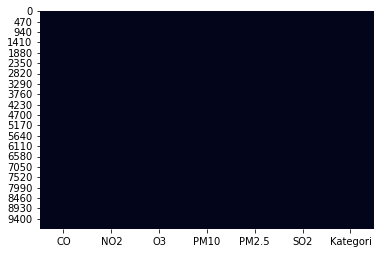

In [140]:
# Showing the count of Nans
print(df_drop.isnull().sum())
sns.heatmap(df_drop.isnull(), cbar = False)
# There is no missing value

**4. Data Visualisation**

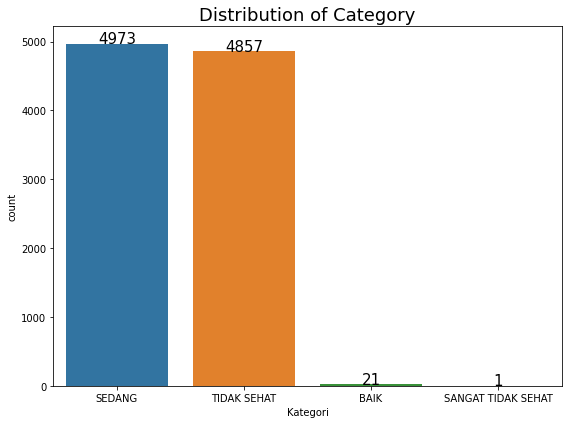

In [141]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Category", fontsize = 18)
ax = sns.countplot(x = df['Kategori'], data = df)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,rect.get_height(), horizontalalignment = 'center', fontsize = 15)       
        
plt.tight_layout()
plt.show()

Agar data seimbang maka data dengan kategori "BAIK" dan "SANGAT TIDAK SEHAT" dihapus/tidak digunakan.

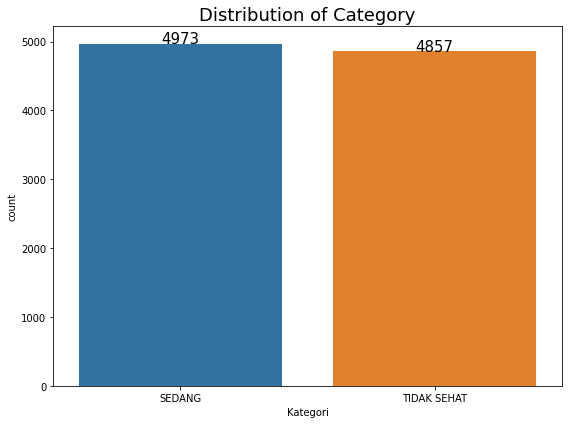

In [142]:
df_drop2 = df.loc[df['Kategori'].isin(['SEDANG', 'TIDAK SEHAT'])]

plt.figure(figsize=(8, 6))
plt.title("Distribution of Category", fontsize = 18)
ax = sns.countplot(x = df_drop2['Kategori'], data = df_drop2)

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,rect.get_height(), horizontalalignment = 'center', fontsize = 15)       
        
plt.tight_layout()
plt.show()

In [143]:
# Select columns
df_drop2 = df_drop2.drop(['Max', 'Critical'], axis = 1)
df_drop2 = df_drop2.loc[df_drop2['Kategori'].isin(['SEDANG', 'TIDAK SEHAT'])]

# Convert category to numeric
convert = {'SEDANG': 1, 'TIDAK SEHAT': 2}
df_drop2['Kategori'] = df_drop2['Kategori'].apply(lambda x: convert[x])
df_drop2

,CO,NO2,O3,PM10,PM2.5,SO2,Kategori
0,1.730000,2.428571,12.380952,31.70,57.894737,2.417582,1
1,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,1
2,2.615714,4.857143,12.476190,47.20,71.929825,4.505495,1
3,2.608571,4.785714,12.428571,47.10,71.804511,4.395604,1
4,3.745714,5.142857,18.857143,57.35,87.468672,5.384615,1
...,...,...,...,...,...,...,...
9847,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,2
9848,7.762857,13.428571,27.095238,75.15,115.894737,11.428571,2
9849,7.755714,13.428571,27.095238,75.10,115.789474,11.428571,2
9850,9.004286,13.214286,27.428571,84.85,130.210526,11.868132,2


<AxesSubplot:title={'center':"Pearson's Correlation Coefficient Using Heatmap"}>

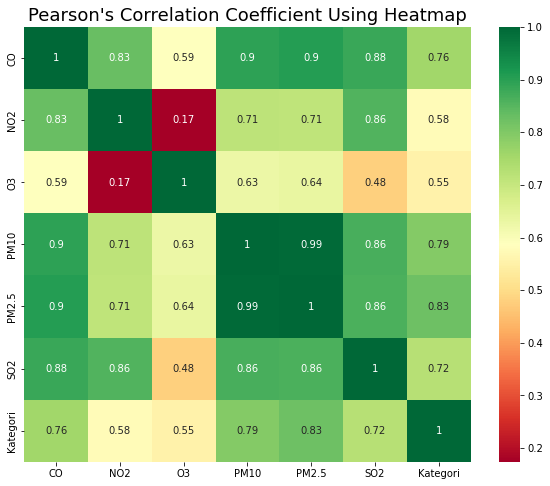

In [144]:
# Finding Pearson's Correlation Coefficient Using Heatmap
plt.figure(figsize=(10,8))
plt.title("Pearson's Correlation Coefficient Using Heatmap", fontsize = 18)
sns.heatmap(df_drop2.corr(), annot=True, cmap ='RdYlGn')

<AxesSubplot:title={'center':'Features Correlating with Categori'}>

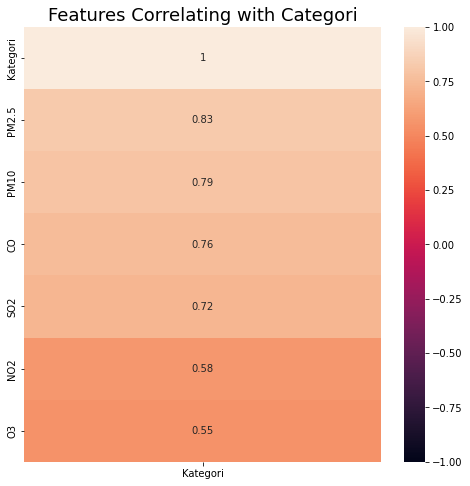

In [145]:
# Correlation
plt.figure(figsize=(8, 8))
plt.title("Features Correlating with Categori", fontsize = 18)
sns.heatmap(df_drop2.corr()[['Kategori']].sort_values(by='Kategori', ascending=False), vmin=-1, vmax=1, annot=True)

In [146]:
px.pie(df_drop2, names = "Kategori", title = "Precentage of Category")

In [147]:
# Histogram of Factors Affecting Air Quality

co = px.histogram(df_drop2, x = "CO", color = "Kategori", title= "Factors Affecting Air Quality: CO")
co.show()

no2 = px.histogram(df_drop2, x = "NO2", color = "Kategori", title= "Factors Affecting Air Quality: NO2")
no2.show()

o3 = px.histogram(df_drop2, x = "O3", color = "Kategori", title= "Factors Affecting Air Quality: O3")
o3.show()

pm10 = px.histogram(df_drop2, x = "PM10", color = "Kategori", title= "Factors Affecting Air Quality: PM10")
pm10.show()

pm25 = px.histogram(df_drop2, x = "PM2.5", color = "Kategori", title= "Factors Affecting Air Quality: PM2.5")
pm25.show()

so2 = px.histogram(df_drop2, x = "SO2", color = "Kategori", title= "Factors Affecting Air Quality: SO2")
so2.show()

**5. KNN Algorithm**

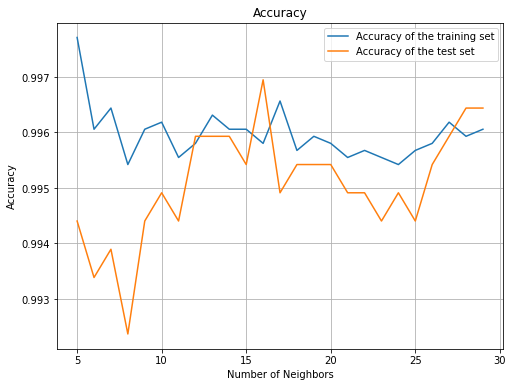

In [156]:
training_acc = []
test_acc = []

# Split The Data Into Train Test Set (80:20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

# Try KNN For Different KNN From 5 to 30
neighbors_setting = range(5, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))

plt.figure(figsize=(8, 6))
plt.title("Accuracy")
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

In [149]:
max_test_score = max(test_acc)
test_scores_ind = [i for i, v in enumerate(test_acc) if v == max_test_score]

print('Max test score {} % and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 99.69481180061037 % and k = [12]


60:40 = Max test score 99.61851475076297 % and k = [20, 21]
70:30 = Max test score 99.69481180061037 % and k = [22, 25]
80:20 = Max test score 99.69481180061037 % and k = [12]

**6. Result Visualisation**

In [150]:
# Use The Best K
K = 12
clf = KNeighborsClassifier(K)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       990
           2       1.00      0.99      1.00       976

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966



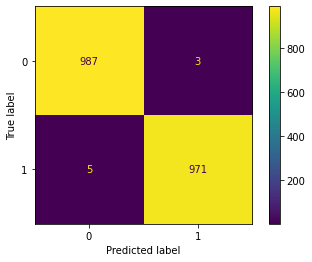

In [151]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

**7. Prediction system by user input**

In [152]:
# Assuming 'X' contains your feature matrix and 'y' contains your target variable
X = df_drop2.drop(['Kategori'], axis=1)
y = df_drop2['Kategori']

# Encode target labels if they are strings
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a KNN classifier with desired number of neighbors (k)
k = 1  # Use the best K
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y_encoded)

# Get input from the user for 6 features
user_input = []
feature_names = X.columns.tolist()  # Get the list of feature names
for feature_name in feature_names:
    feature_value = float(input(f"Enter {feature_name}: "))
    user_input.append(feature_value)

# Predict the class for the user input using KNN
user_input_array = pd.DataFrame([user_input], columns=feature_names)
predicted_class_encoded = knn.predict(user_input_array)

# Decode the predicted label
predicted_class = label_encoder.inverse_transform(predicted_class_encoded)

print("==============================")
print("SISTEM PREDIKSI KUALITAS UDARA")
print("==============================")

for i, feature_name in enumerate(feature_names):
    print(f'{feature_name}: {user_input[i]}')

if predicted_class == 1:
    print(">>> Hasil prediksi kualitas udara berdasarkan parameter di atas adalah: SEDANG")
elif predicted_class == 2:
    print(">>> Hasil prediksi kualitas udara berdasarkan parameter di atas adalah: TIDAK SEHAT")

SISTEM PREDIKSI KUALITAS UDARA
CO: 20.0
NO2: 30.0
O3: 50.0
PM10: 60.0
PM2.5: 30.0
SO2: 30.0
>>> Hasil prediksi kualitas udara berdasarkan parameter di atas adalah: SEDANG


**8. Saving 15 Randomly Selected Rows of Training Data for Manual Prediction Using Euclidean Distance Calculation**

In [154]:
# Generate random indices to select 12 rows
indeks_acak = np.random.choice(x_train.shape[0], size=15, replace=False)

# Select 10 random rows from the training data
data_latih_acak = x_train[indeks_acak]
label_latih_acak = y_train[indeks_acak]

# Create a DataFrame from the randomly selected training data
data_latih_acak_df = pd.DataFrame(data_latih_acak, columns=['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2'])
data_latih_acak_df['Kategori'] = label_latih_acak

# Save the randomly selected training data to an Excel file
file_path = "DataLatih_Prediksi_Perhitungan Euclidean Distance_Neww.xlsx"
data_latih_acak_df.to_excel(file_path, index=False)